# Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Combining multiple .csv files into a single DataFrame

In [2]:
all_sales_data = pd.concat(map(pd.read_csv, glob.glob('C://Users//gagan//Desktop//Python//Personal Projects//Datasets//Sales_Data/*.csv')))

In [3]:
# Storing the DataFrame into a single csv file. 
all_sales_data.to_csv('all_data.csv',index=False)

#### Read in updated CSV file into new DataFrame

In [4]:
all_data = pd.read_csv('all_data.csv')

### Understanding the Dataset - Columns, Rows, Null Values, and Duplicate Values

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
all_data.shape

(186850, 6)

In [8]:
# Null Values
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


### Data Cleaning - Removing NaNs, Duplicate Values and Correcting Column Data Types

    1.Find and drop NaN records from the data

In [10]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
all_data = all_data.dropna(axis=0,how='all')

In [12]:
# Verify - All null values removed. 
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

    2.Find and remove rows with duplicate values

In [13]:
all_data.drop_duplicates(inplace=True)

In [14]:
# Verify - Duplicated rows removed.
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


    3.Converting columns to the correct data type

In [15]:
# Removing the row where the column header Quantity Ordered is repeated
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']

In [16]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [17]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [18]:
# Verify - Columns converted to numeric data type.
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [19]:
all_data = all_data.reset_index().drop(axis=1,labels='index')

### Augment data with additional columns

    1. Adding a month column

In [22]:
all_data['Month'] = all_data['Order Date'].dt.month_name()

    2.Add a Sales Column

In [21]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [23]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99
...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97
185682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00
185683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99


    3. Add a City, State and a City and State combined Column

In [24]:
def get_city(char):
    return char.split(',')[1].strip()

In [25]:
def get_state(char):
    return char.split(',')[2][0:3].strip()

In [26]:
def get_city_state(char):
    return char.split(',')[1].lstrip() + char.split(',')[2][0:3].rstrip()

In [27]:
all_data['City'] = np.vectorize(get_city)(all_data['Purchase Address'])
all_data['State'] = np.vectorize(get_state)(all_data['Purchase Address'])
all_data['City_State'] = np.vectorize(get_city_state)(all_data['Purchase Address'])

    4.Add an Hour and Minute Column

In [28]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City_State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,TX,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,MA,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA,Los Angeles CA,9,27


### Data Exploration

#### Q1. What was the best month for sales? How much was earned through that month? 

    December recorded the highest volume of sales with a total sales value of (USD)4,608,295.70 and a total of 28,074 
    products sold.

In [30]:
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

all_data['Month'] = pd.Categorical(all_data['Month'],categories=months,ordered=True)

In [31]:
results = all_data.groupby('Month').sum()

In [32]:
results.sort_values(by="Sales",ascending=False)

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
December,28074,4583267.77,4608295.70,359431,731685
October,22669,3713608.80,3734777.86,290183,597427
April,20536,3366218.76,3389217.98,261916,543611
November,19769,3178872.53,3197875.05,254430,517369
May,18653,3133134.61,3150616.23,238580,487579
March,16979,2789084.64,2804973.35,218622,446783
July,16054,2631225.12,2646461.32,205909,416896
June,15234,2560503.50,2576280.15,195223,401839
August,13429,2226963.90,2241083.37,172049,353246


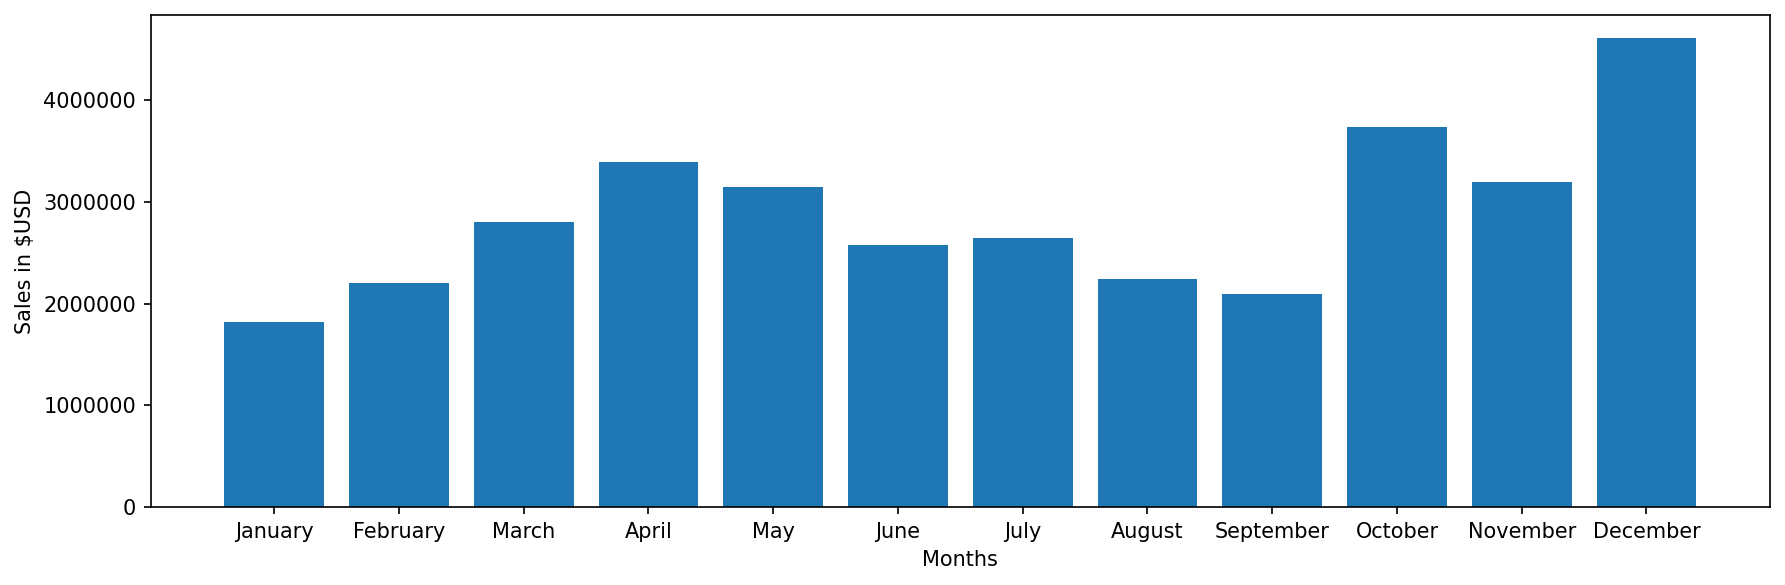

In [33]:
plt.figure(dpi=150,figsize=(12,4))
plt.bar(x=months,height=results['Sales'])
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('Months')
plt.ylabel('Sales in $USD')
plt.tight_layout()
plt.show()

#### 2. What city had the highest number of sales? 

    Across all the locations among the 10 cities, the highest volume of sales was recorded in San Franciso followed by 
    Los Angeles and New York City.

In [34]:
sales_by_city = all_data.groupby('City_State').sum()[['Sales']].sort_values(by ='Sales',ascending=False)

In [35]:
sales_by_city.index

Index(['San Francisco CA', 'Los Angeles CA', 'New York City NY', 'Boston MA',
       'Atlanta GA', 'Dallas TX', 'Seattle WA', 'Portland OR', 'Austin TX',
       'Portland ME'],
      dtype='object', name='City_State')

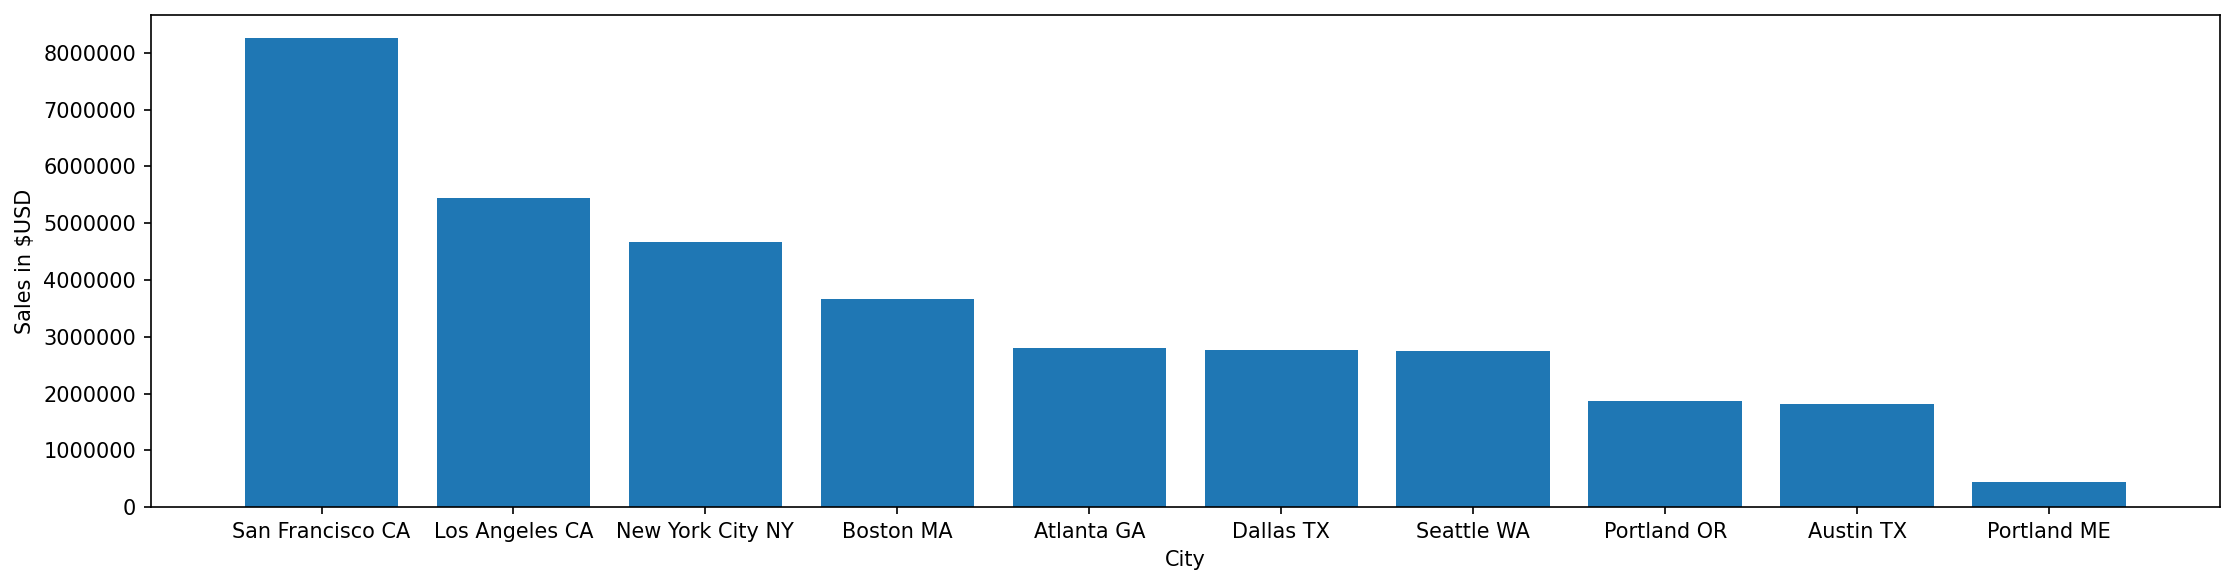

In [36]:
plt.figure(dpi=150,figsize=(15,4))
plt.bar(x=sales_by_city.index,height=sales_by_city['Sales'])
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('City')
plt.ylabel('Sales in $USD')
plt.tight_layout()
plt.show()

#### 3. What time should we display advertisements to maximize the likelihood of customer's buying our product?

    The graph below shows the distribution of products sold throughout different hours of the day. It can be observed that
    the peak hours during the day is between 11 AM to 12 PM and 6 PM to 8 PM during evenings. My recommendation would be 
    to display more advertisements starting just before and lasting through the peak hours, i.e., between 10 AM - 12 PM
    and 6 PM - 8 PM.

In [37]:
hour_count = all_data.groupby('Hour').count()['Product']

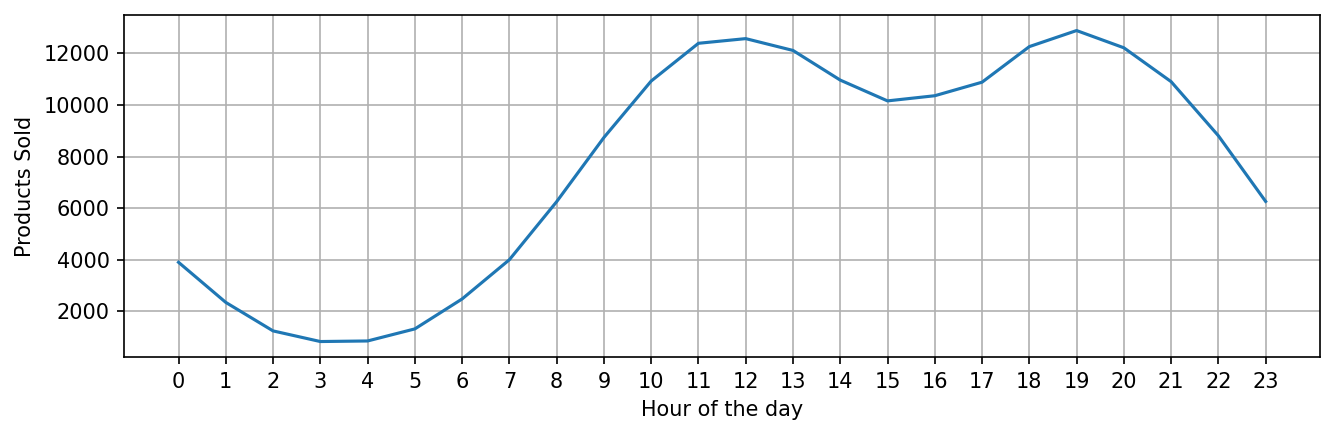

In [38]:
# We should display more advertisements during the peak hours of the day when sales are comparatively higher. In this case, 
# displaying advertisements just before or during 11AM and 7 PM would likely boost sales.

# Idea - break this down by city. 

plt.figure(figsize=(9,3),dpi=150)
plt.plot(hour_count.index,hour_count)
plt.xticks(hour_count.index)
plt.xlabel('Hour of the day')
plt.ylabel('Products Sold')
plt.grid()
plt.tight_layout();

#### Q4. What products are most often sold together? 

    The most common combination of products sold together were the iPhone and Google Phones with their respective charging 
    cables. Some buyers also purchased wired headphones along with their phones while iPhone users also purchased Airpods
    along with their phones. 

In [39]:
# Storing all the duplicated Order ID values into another DataFrame. (keep=False) will keep all the instances of 
# duplicated records instead of just the first occurence 

duplicated_order_id = all_data[all_data['Order ID'].duplicated(keep=False)]

In [40]:
duplicated_order_id['Grouped'] = duplicated_order_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\gagan\AppData\Local\Temp\ipykernel_19196\1736189162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_order_id['Grouped'] = duplicated_order_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [41]:
duplicated_order_id.groupby('Grouped').count().sort_values(by='Quantity Ordered',ascending=False)[['Quantity Ordered']].head(10)

,Quantity Ordered
Grouped,
"iPhone, Lightning Charging Cable",1772
"Google Phone, USB-C Charging Cable",1714
"iPhone, Wired Headphones",722
"Vareebadd Phone, USB-C Charging Cable",624
"Google Phone, Wired Headphones",606
"iPhone, Apple Airpods Headphones",572
"Google Phone, Bose SoundSport Headphones",322
"Google Phone, USB-C Charging Cable, Wired Headphones",237
"Vareebadd Phone, Wired Headphones",208


#### Q5. What products were sold most individually? Why did they sell most? 

    The most commonly sold products were the AAA and AA battery packs (4-pack) followed by Lightning Charging Cables and
    USB-C Charging Cables. On the other hand, the least ordered products were the LG washing machines and dryers. 
    
    From the Price/Quantity Ordered graph below it can be deduced that products with a lower average price sold more 
    compared to products with a higher average prices. 
    
    For instance, AAA batteries had the lowest average price but 
    were sold the most number of times among all products while Macbook Pro Laptop had the highest average price of (USD)
    1700 but were ordered only 4725 times. 

In [42]:
product_group = all_data.groupby('Product').sum()[['Quantity Ordered']]
product_group

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


In [43]:
avg_price = all_data.groupby('Product').mean()[['Price Each']]

In [44]:
avg_price

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


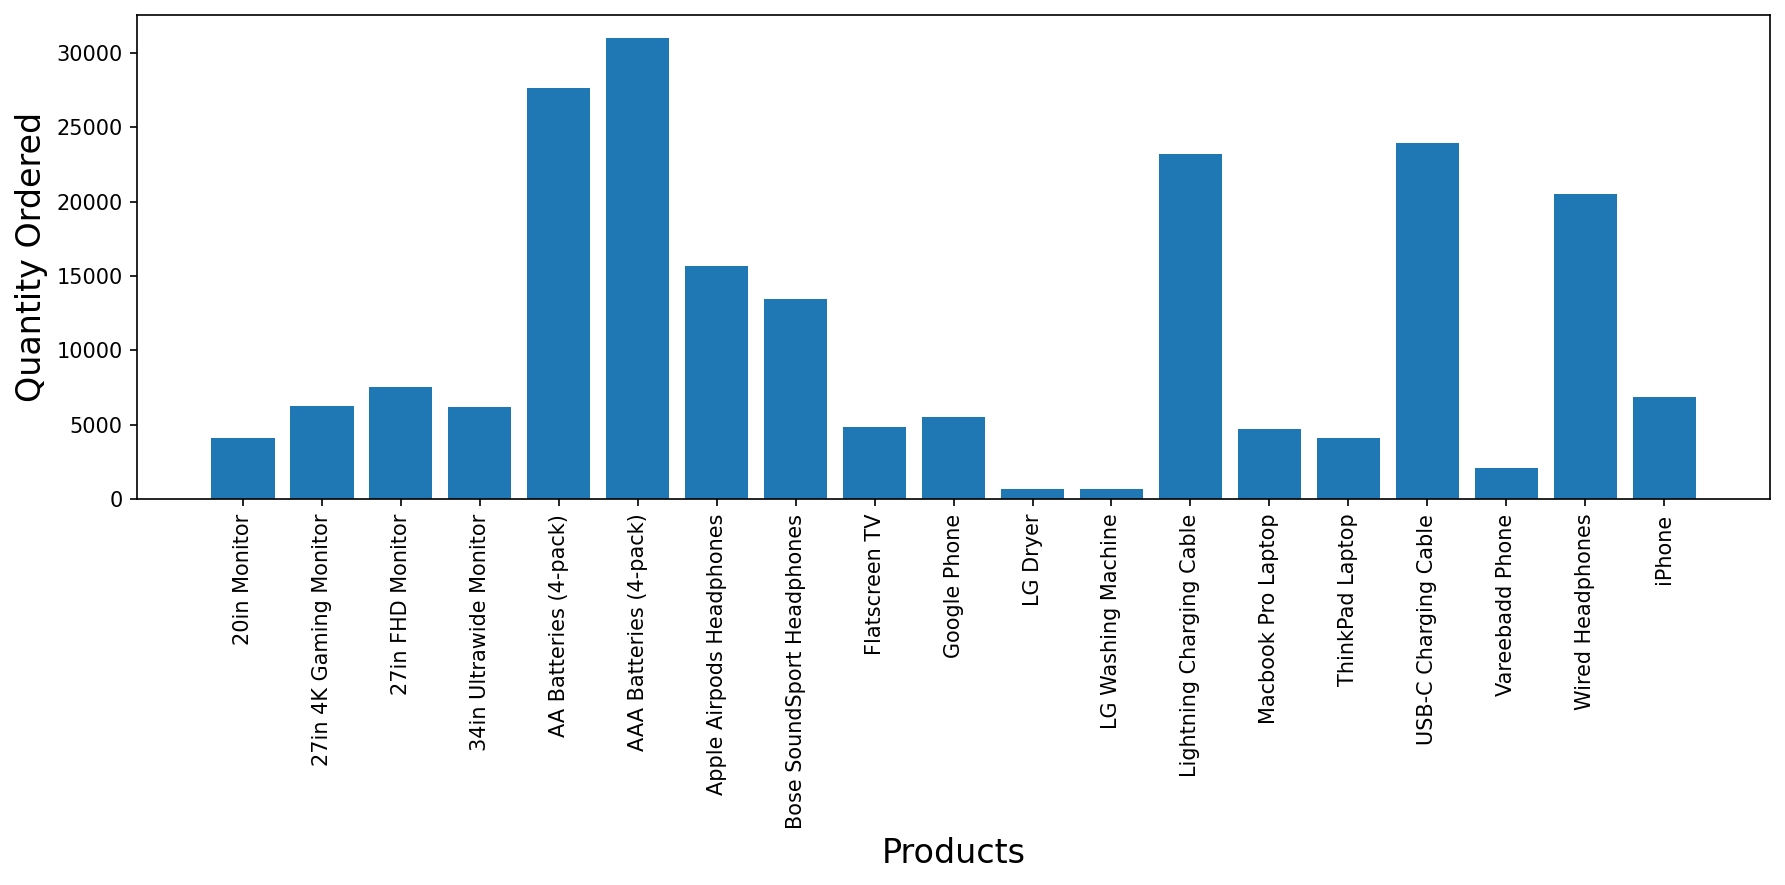

In [45]:
# Quantity Ordered
plt.figure(figsize=(12,6),dpi=150)
plt.bar(x=product_group.index,height=product_group['Quantity Ordered'])
plt.xticks(product_group.index,size=10,rotation='vertical')
plt.xlabel('Products',size=16)
plt.ylabel('Quantity Ordered', size=16)
plt.tight_layout()
plt.show()

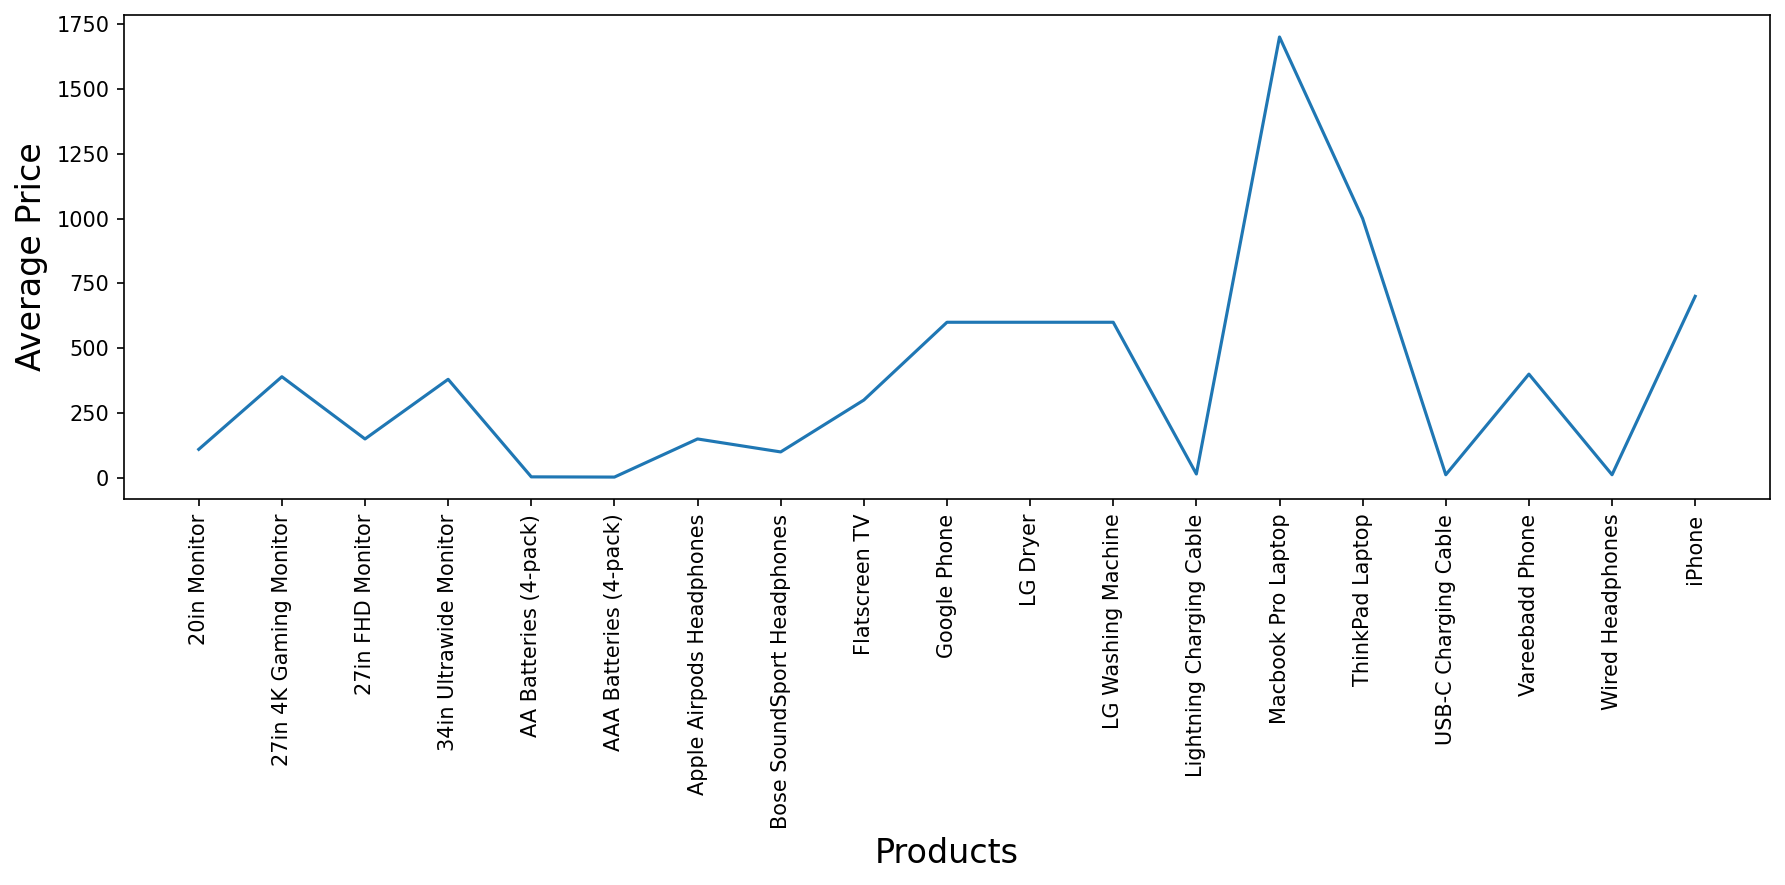

In [46]:
  # Average Price
plt.figure(figsize=(12,6),dpi=150)
plt.plot(avg_price)
plt.xticks(product_group.index,size=10,rotation='vertical')
plt.xlabel('Products',size=16)
plt.ylabel('Average Price', size=16)
plt.tight_layout()
plt.show()

C:\Users\gagan\AppData\Local\Temp\ipykernel_19196\2949615043.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(product_group.index,rotation='vertical')


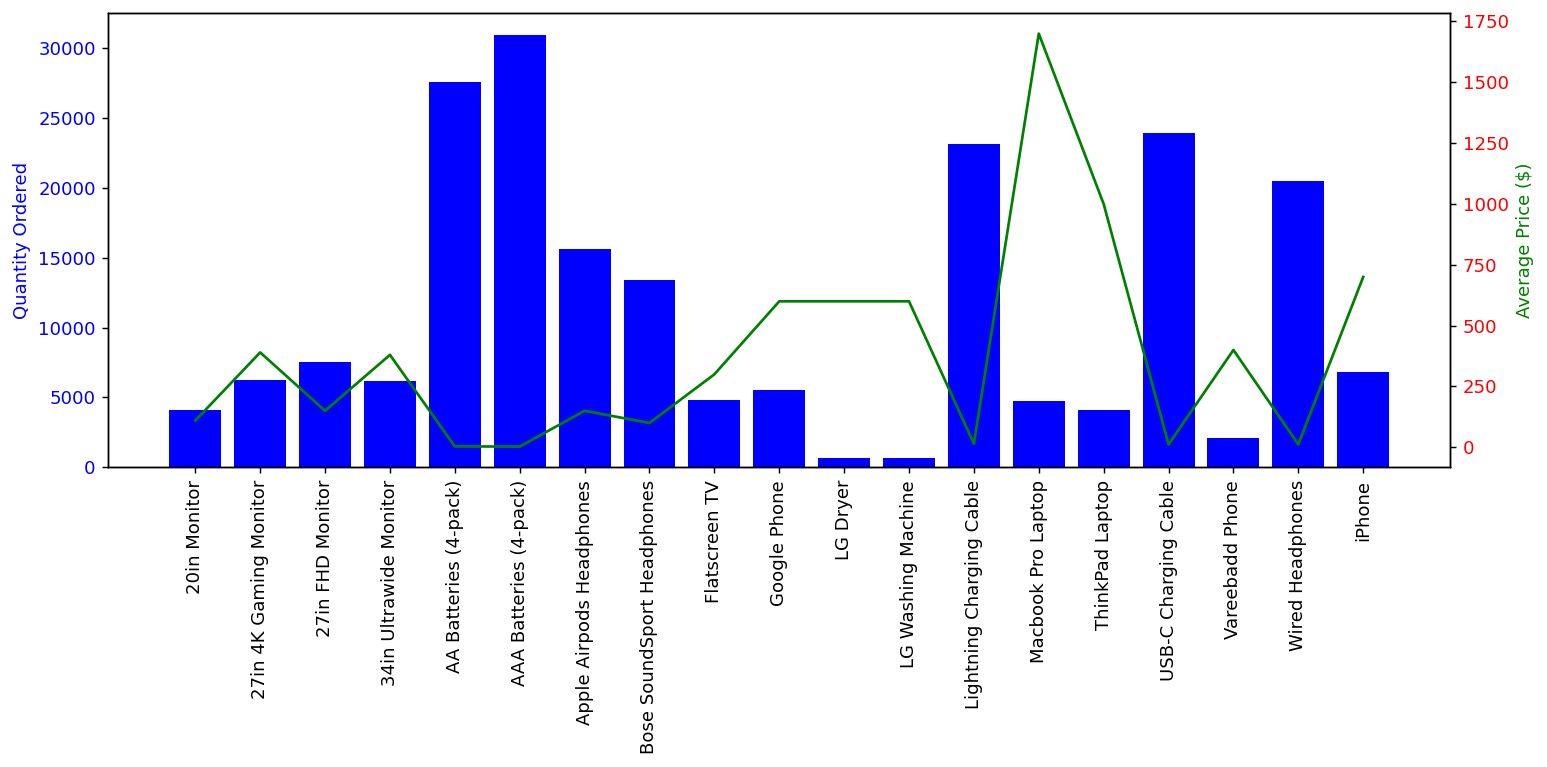

In [47]:
# Overlaying both graphs

fig, ax = plt.subplots(figsize=(12,6),dpi=130)


# Quantity Ordered
ax.bar(product_group.index,product_group['Quantity Ordered'],color='blue')
ax.set_ylabel('Quantity Ordered',color='blue', size=10)

for ticklabel in ax.get_yticklabels(): # To change the color of the ticks on the y axis (the  values)
    ticklabel.set_color('blue')


# Average Price
ax1 = ax.twinx()
ax1.plot(product_group.index,avg_price['Price Each'],color='green')
ax1.set_ylabel('Average Price ($)',color='green', size=10)


# rotating x axis ticklabels 
ax.set_xticklabels(product_group.index,rotation='vertical')


for ticklabel in ax1.get_yticklabels():
    ticklabel.set_color('red')


plt.tight_layout()

plt.show()